# Vocal tract modelling

In this notebook, the geometry of a vocal tract will be inferred using the boundary element method (BEM) and a genetic algorithm. First, the BEM will be used to build an acoustic model of a vocal tract. 

In [12]:
include("../BEM_base.jl"); # The BEM algorithms are defined in the BEM_base

In [13]:
# Set the msh file location
file = "../dados/vocal_tract/vocal_tract_A_bothclosed.msh";
# Build the domain points
L = 140; # Length of the vocal tract
n_pint = 50; # Number of domain points
PONTOS_int = zeros(n_pint,4);
delta = 1; # distance from both ends 
step = (L-2*delta)/(n_pint-1);
for i = 1:n_pint
    PONTOS_int[i,:] = [i 0 0 delta+(i-1)*step];
end
# Set the boundary conditions for each face. Vowel /A/ model has 30 faces
BCFace = ones(30,3);
BCFace[:,3] = 0;
BCFace[1,:] = [1 0 1]; # Neumann (pressure = 1) to the Glotis
BCFace[30,:] = [30 0 0]; # Neumann (pressure = 0) to the mouth
CW = 343*1000; # Speed of sound in mm/s
k = 774/CW/2/pi; # Set the wavenumber
# Solve the BEM model
u,q,uint,qint = BEM_base(file,PONTOS_int,BCFace,k, "wave");

Importing mesh...
  0.390657 seconds (107.61 k allocations: 4.542 MiB)
Building G and H matrices...
 11.732260 seconds (224.62 M allocations: 10.571 GiB, 19.40% gc time)
Applying boundary conditions to build A and b for the linear system...
  0.080089 seconds (1.61 k allocations: 24.062 MiB, 4.48% gc time)
Solving the linear system...
  0.146617 seconds (13 allocations: 10.279 MiB)
Separating acoustic pressure from flux...
  0.053336 seconds (3.61 k allocations: 222.383 KiB)
Solving for domain points.
  0.717087 seconds (13.65 M allocations: 658.150 MiB, 18.82% gc time)
  1.597779 seconds (31.96 M allocations: 1.196 GiB, 14.99% gc time)


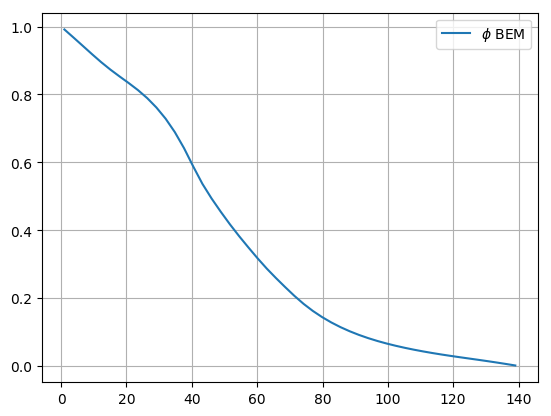

PyObject <matplotlib.legend.Legend object at 0x7fceaa48a6d8>

In [15]:
# Graph the results
using PyPlot
plot(PONTOS_int[:,4],real(uint),label=L"$\phi$ BEM")
#plot(PONTOS_int[:,4],real(qint),label=L"$q$ BEM")
grid(1)
legend()

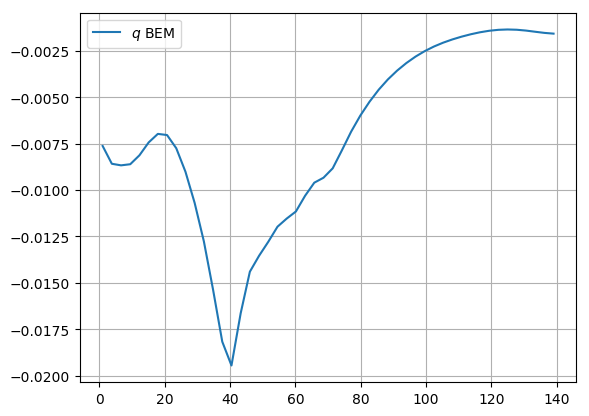

PyObject <matplotlib.legend.Legend object at 0x7fceaa3cab70>

In [16]:
plot(PONTOS_int[:,4],real(qint),label=L"$q$ BEM")
grid(1)
legend()